In [1]:
import Charts

In [2]:
import SharedParameters

In [3]:
lower_bound_path = 'results_tr_Amazon_PA_classification_S_Amazon_PA_T_Cerrado_MA/'
lower_bound_checkpoint = 'checkpoint_tr_Amazon_PA_classification_Amazon_PA/'

upper_bound_source_only_path = 'results_tr_Cerrado_MA_classification_S_Cerrado_MA_T_Cerrado_MA/'
upper_bound_source_only_checkpoint = 'checkpoint_tr_Cerrado_MA_classification_Cerrado_MA/'

single_target_path = 'results_tr_Amazon_PA_to_Cerrado_MA_domain_adaptation_DR_single_Cerrado_MA_wrmp1_gamma_2.5_skipconn_True/'
single_target_checkpoint = 'checkpoint_tr_Amazon_PA_to_Cerrado_MA_domain_adaptation_DR_single_Cerrado_MA_wrmp1_gamma_2.5_skipconn_True/'



result_path = [    
    'results_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_True_wrmp_1_Cerrado_MA_skipconn_True/',
    'results_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_False_wrmp_1_Cerrado_MA_skipconn_True/',
    #'results_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_False_gamma_0.25_Cerrado_MA_skipconn_True/'
]

checkpoint_list = [
    'checkpoint_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_True_wrmp_1_Amazon_RO_Cerrado_MA_skipconn_True/',
    'checkpoint_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_False_wrmp_1_Amazon_RO_Cerrado_MA_skipconn_True/',
    #'checkpoint_tr_Amazon_PA_to_Amazon_RO_Cerrado_MA_domain_adaptation_DR_FC_multi_discriminate_target_False_gamma_0.25_Amazon_RO_Cerrado_MA_skipconn_True/'
]

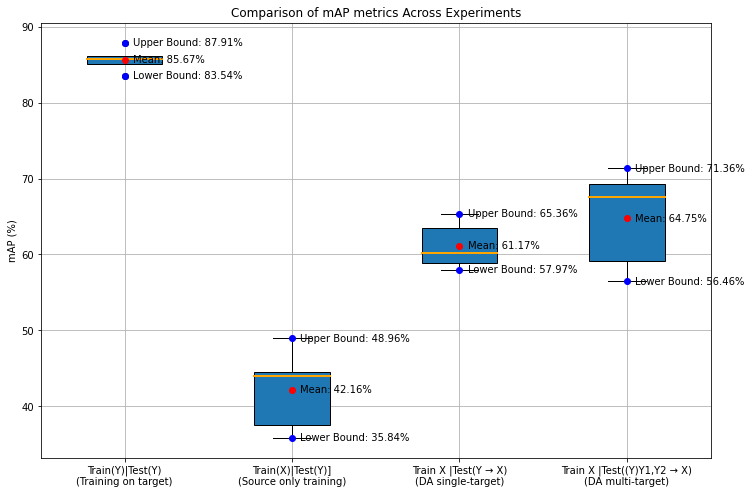

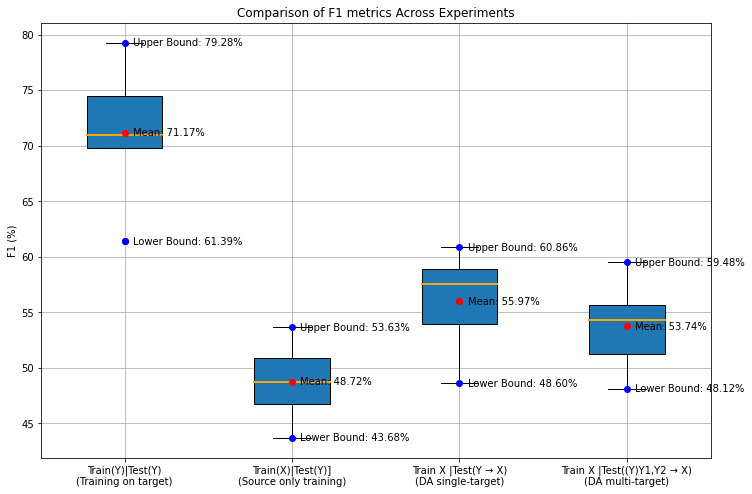

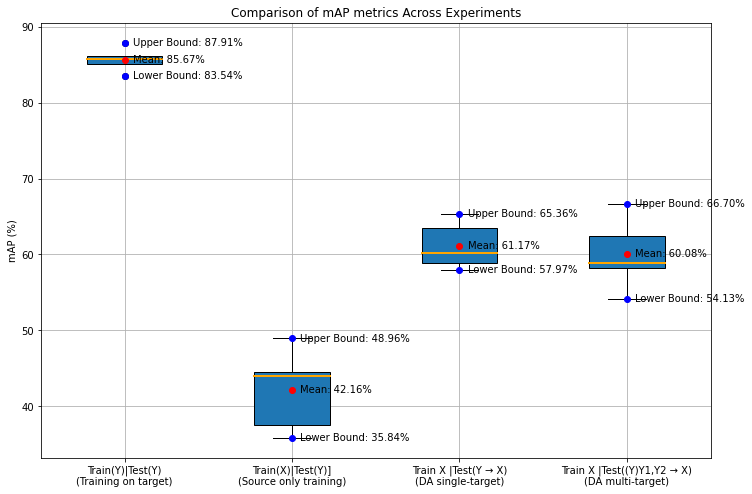

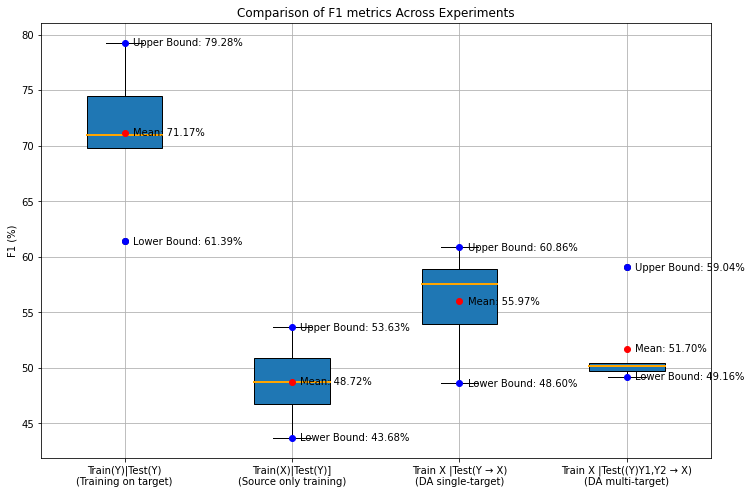

In [4]:
import os

base_path = SharedParameters.RESULTS_MAIN_PATH

output_directory = "./results/results/"

cont = 1

titles = 'X=PA, Y=MA(Y1=RO,Y2=MA)\n'
map_file = 'Multi_Target_Ts_PA_Eval_MA_'
metrics_file = 'Metrics_Multi_Target_Ts_PA_Eval_MA_'
for i in range(0, len(result_path)):
    file_title = map_file+str(cont)
    result_path_ = [upper_bound_source_only_path,lower_bound_path,single_target_path,result_path[i]]
    labels_ = [SharedParameters.UPPER_BOUND_SOURCE_ONLY_LABEL,SharedParameters.LOWER_BOUND_LABEL,SharedParameters.SINGLE_TARGET_LABEL,SharedParameters.MULTI_TARGET_LABEL]
    checkpoint_list_ = [upper_bound_source_only_checkpoint,lower_bound_checkpoint,single_target_checkpoint,checkpoint_list[i]]

    title = titles + "DA multi-target " + SharedParameters.EXPERIMENTS_LABELS[i]

    #Charts.create_map_f1_boxplot(result_path_,labels_,SharedParameters.RESULTS_MAIN_PATH, path_to_export_chart, file_title)

    map_list = []
    f1_list = []
    
    for rf in range(len(result_path_)):

        result_folder = os.path.join(base_path,result_path_[rf])

        if not os.path.exists(result_folder):
            continue

        map_values, f1_values = Charts.extract_map_and_f1(os.path.join(result_folder,'Results.txt'))

        map_list.append(map_values)
        f1_list.append(f1_values)


        #print(os.path.join(result_folder,'Results.txt'))
        #print(map_values)
        #print(f1_values)
        
    cont += 1
    
    Charts.generate_combined_boxplot(output_directory,map_list,'mAP',labels_, file_title, "Comparison of mAP metrics Across Experiments")
    Charts.generate_combined_boxplot(output_directory,f1_list,'F1',labels_, file_title, "Comparison of F1 metrics Across Experiments")

In [5]:
map_list

[[86.08, 87.91, 85.07, 85.76, 83.54],
 [43.95, 44.47, 48.96, 35.84, 37.57],
 [57.97, 60.15, 65.36, 63.51, 58.85],
 [58.9, 58.19, 66.7, 62.46, 54.13]]

In [6]:
f1_list

[[74.46, 79.28, 61.39, 69.77, 70.97],
 [53.63, 50.9, 48.68, 46.7, 43.68],
 [58.93, 48.6, 60.86, 57.54, 53.93],
 [49.68, 50.19, 59.04, 50.42, 49.16]]